In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.random import randn

In [2]:
#Download csv file
Dust_file = pd.read_csv('dust_dataHW1 (1).csv')

In [3]:
#Print csv file name
Dust_file

,Unnamed: 0,Ecosystem,Season,P_conc,Ca_conc,flux_gm2yr
0,1,Foothills,NDJ,1028.00,10861.0,5.307173
1,2,Montane,NDJ,778.00,7455.0,8.608287
2,3,Foothills,FMA,1134.00,9418.0,6.999662
3,4,Montane,FMA,1235.50,8839.5,7.370548
4,5,Plains,MJ,2417.95,8247.0,15.986543
5,6,Foothills,MJ,3245.30,5843.0,21.734655
6,7,Montane,MJ,3558.50,4760.5,12.983546
7,8,Plains,JAS,2007.50,9701.5,14.282538
8,9,Foothills,JAS,2652.00,8372.5,9.707827
9,10,Montane,JAS,2813.00,7236.5,10.445604


In [4]:
#Deliverable 2 Part 1
#Calculate Ca and P flux

#Units: 
#P_conc: mg/l
#Ca_conc: mg/l
#Flux: g/m2 yr
#Ca_flux: g/m2 yr
#P_flux: g/m2 yr
#Density of water: L/g

#Conversions
#0.001 L = 1 g
#1000 mg = 1 g

#Convert mg/l of Ca and P to g/l by dividing by 1000 mg
Ca_conc_g_per_L = Dust_file['Ca_conc']/1000
P_conc_g_per_L = Dust_file['P_conc']/1000

#Density of water in L/g
density_of_water = (0.001/1)

#Flux
Flux = Dust_file['flux_gm2yr']

#Ca and P in g/m2yr by multiplying by density of water and the flux
Ca_flux = Ca_conc_g_per_L*density_of_water*Flux
P_flux = P_conc_g_per_L*density_of_water*Flux



In [5]:
Ca_flux

0     0.057641
1     0.064175
2     0.065923
3     0.065152
4     0.131841
5     0.126996
6     0.061808
7     0.138562
8     0.081279
9     0.075590
10    0.083625
11    0.077414
dtype: float64

In [6]:
P_flux

0     0.005456
1     0.006697
2     0.007938
3     0.009106
4     0.038655
5     0.070535
6     0.046202
7     0.028672
8     0.025745
9     0.029383
10    0.023189
11    0.021352
dtype: float64

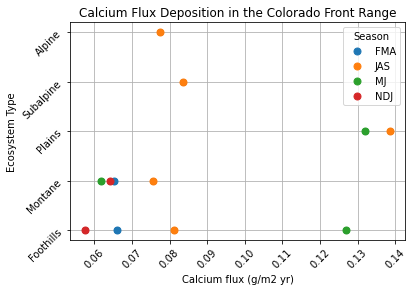

In [7]:
#Deliverable 1 Part 1
#Patterns of Ca flux along elevation across season

##Add Ca_flux to the dataframe
Dust_file['Ca_flux'] = Ca_flux

#Plot Ca_flux
plt.figure(figsize=(6, 4))
x = Ca_flux
y = Dust_file['Ecosystem']
groups = Dust_file.groupby('Season')
for name, group in groups:
    plt.plot(group['Ca_flux'], group['Ecosystem'], marker='o', linestyle='', markersize=7, label=name)
plt.legend(loc="upper right", title="Season", fontsize=10)
plt.title('Calcium Flux Deposition in the Colorado Front Range')
plt.ylabel('Ecosystem Type')
plt.xlabel('Calcium flux (g/m2 yr)')
plt.tick_params(labelrotation=45)
plt.scatter(x, y)
plt.grid()
plt.savefig('Calcium Flux Deposition.png')
plt.show()

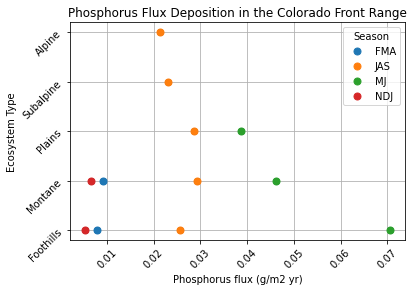

In [8]:
#Deliverable 1 Part 1
#Patterns of Ca flux along elevation across season

##Add Ca_flux to the dataframe
Dust_file['P_flux'] = P_flux

#Plot P_flux
plt.figure(figsize=(6, 4))
x = P_flux
y = Dust_file['Ecosystem']
groups = Dust_file.groupby('Season')
for name, group in groups:
    plt.plot(group['P_flux'], group['Ecosystem'], marker='o', linestyle='', markersize=7, label=name)
plt.legend(loc="upper right", title="Season", fontsize=10)
plt.title('Phosphorus Flux Deposition in the Colorado Front Range')
plt.ylabel('Ecosystem Type')
plt.xlabel('Phosphorus flux (g/m2 yr)')
plt.tick_params(labelrotation=45)
plt.scatter(x, y)
plt.grid()
plt.savefig('Phosphorus Flux Deposition.jpg')
plt.show()

In [9]:
#Deliverable 1 Part 2
#Net P change in the watershed calculations

#Equations
#Input_P-Output_P = Net_P_Change

#Units: 
#Watershed_Area: km2
#Export_P: kg/ha yr
#Summer Alpine P Flux: g/m2 yr
#Output_P: kg/yr
#Input_P: kg/yr
#Net_P_Change: kg/yr

#Conversions
#1 km2 = 100 ha
#1 km2 = 1000000 m2
#1 g = 0.001 kg

#List values
Watershed_Area = 10 
Export_P = 0.1
Alpine_Summer_Flux = 0.023189

#Multiply Watershed_Area by 100 ha/1 km2 to convert to hectares
Watershed_Area_ha = Watershed_Area*100

#Multiply Export_P by Watershed_Area_ha to convert to kg/yr
Output_P = Export_P*Watershed_Area_ha

#Multiply Alpine_Summer_Flux by 0.001 kg/1 g to convert to kg/m2 yr
Alpine_Summer_Flux_kg = Alpine_Summer_Flux*0.001

#Multiply Watershed_Area by 1000000 m2/1 km2 to convert to m2
Watershed_Area_m2 = Watershed_Area*1000000

#Multiply Alpine_Summer_Flux_kg by Watershed_Area_m2 to convert  from kg/m2 yr to kg/yr
Input_P = Alpine_Summer_Flux_kg*Watershed_Area_m2

#Net_P_Change Equation
Net_P_Change = Input_P-Output_P

#Net_P_Change in kg/yr
print(Net_P_Change)

131.89000000000001
